In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/evavashisth/Desktop/CSC👩🏻‍💻/Personal Projects/Project Thirty/Fraud Pattern Detection and Revenue Protection /creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#understanding the shape of data
df.shape

(284807, 31)

In [5]:
#checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
#check class balance (fraud vs normal)
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
#check fraud percentage
df['Class'].value_counts(normalize=True)*100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [19]:
# -------------------------------
# Goldman Sachs Color Palette
# -------------------------------

GS_BLUE = "#7399c6"
GS_NAVY = "#00355f"
GS_LIGHT_BLUE = "#acd4f1"
GS_BLACK = "#231f20"
GS_GRAY = "#58575a"
GS_WHITE = "#ffffff"

# Palette for sequential use
gs_palette = [GS_BLUE, GS_NAVY, GS_LIGHT_BLUE, GS_GRAY, GS_BLACK]

# -------------------------------
# Global Style Settings
# -------------------------------
plt.style.use("default")

sns.set_theme(
    style="whitegrid",
    rc={
        "axes.facecolor": GS_WHITE,
        "figure.facecolor": GS_WHITE,
        "axes.edgecolor": GS_GRAY,
        "axes.labelcolor": GS_BLACK,
        "xtick.color": GS_BLACK,
        "ytick.color": GS_BLACK,
        "grid.color": GS_GRAY,
        "text.color": GS_BLACK,
        "font.family": "DejaVu Sans",
        "axes.titleweight": "bold",
        "axes.titlesize": 16,
        "axes.labelsize": 13
    }
)

sns.set_palette(gs_palette)

# Exploratory Data Analysis (EDA)
- What fraud looks like?
- What normal transactions look like?
- How amount behaves?
- How time behaves?
- Whether fraud has special patterns

## Check distribution of transaction amounts

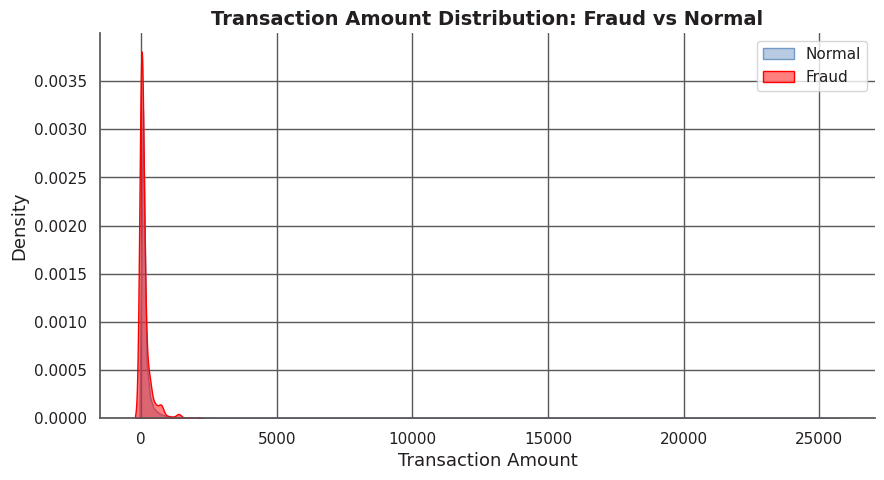

In [22]:
plt.figure(figsize=(10,5))

sns.kdeplot(df[df["Class"] == 0]["Amount"],
            color=GS_BLUE,
            label="Normal",
            fill=True,
            alpha=0.5)

sns.kdeplot(df[df["Class"] == 1]["Amount"],
            color="red",
            label="Fraud",
            fill=True,
            alpha=0.5)

plt.title("Transaction Amount Distribution: Fraud vs Normal", fontsize=14, color=GS_BLACK)
plt.xlabel("Transaction Amount", color=GS_BLACK)
plt.ylabel("Density", color=GS_BLACK)
plt.legend()
sns.despine()
plt.show()


## Compare fraud vs Normal amounts

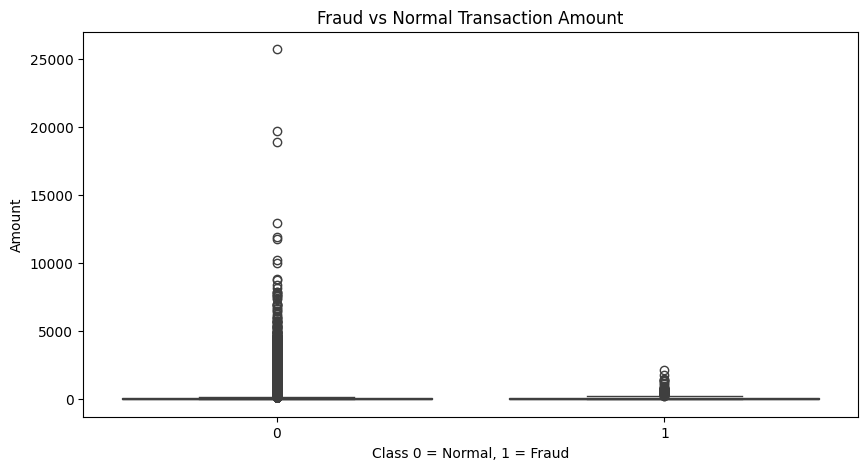

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Fraud vs Normal Transaction Amount")
plt.xlabel('Class 0 = Normal, 1 = Fraud')
plt.ylabel('Amount')
plt.show()

## Look at Time Patterns

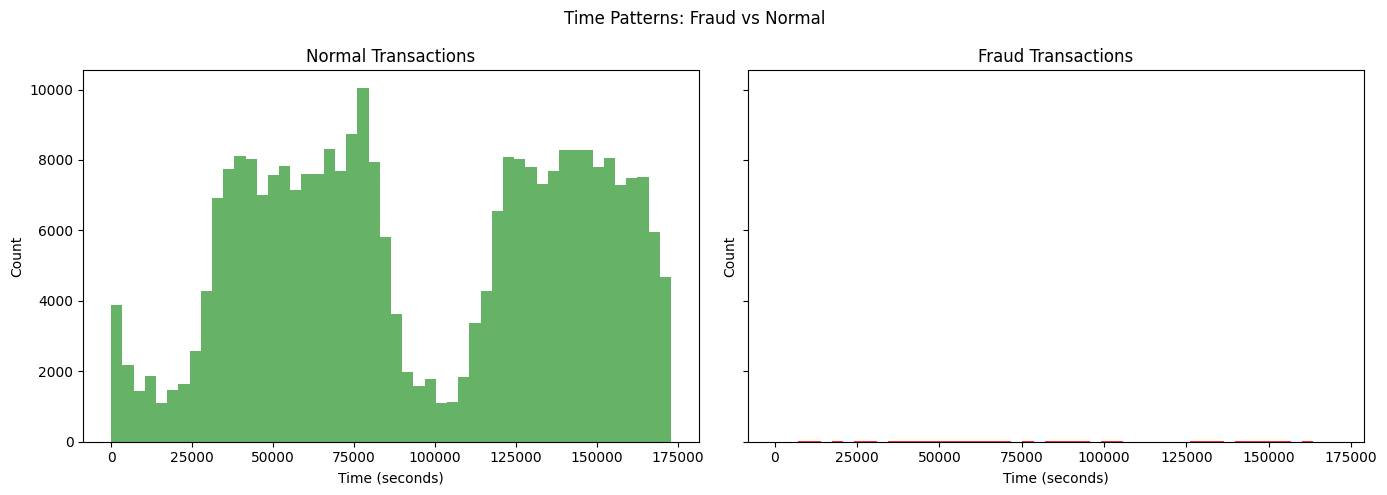

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(14,5), sharey=True)

ax[0].hist(df[df['Class']==0]['Time'], bins=50, color='green', alpha=0.6)
ax[0].set_title("Normal Transactions")

ax[1].hist(df[df['Class']==1]['Time'], bins=50, color='red', alpha=0.8)
ax[1].set_title("Fraud Transactions")

for a in ax:
    a.set_xlabel("Time (seconds)")
    a.set_ylabel("Count")

plt.suptitle("Time Patterns: Fraud vs Normal")
plt.tight_layout()
plt.show()


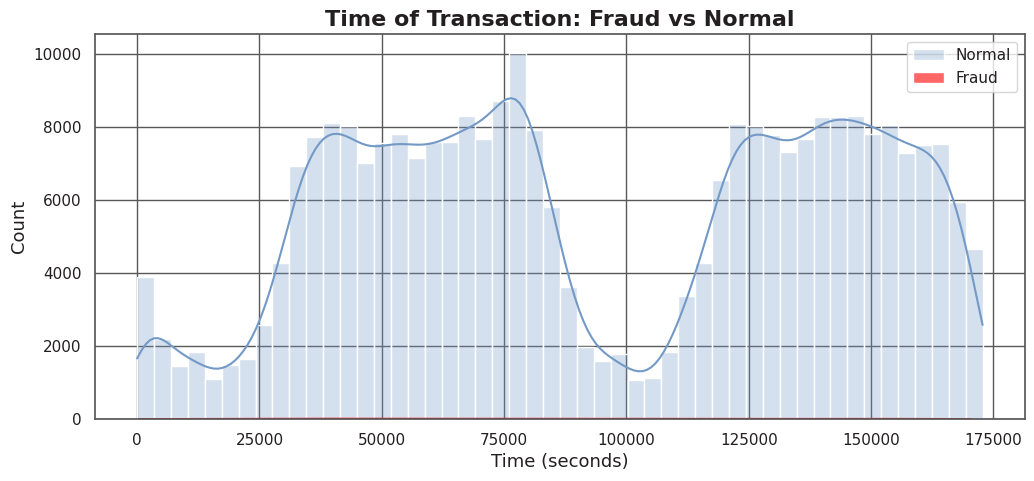

In [25]:
plt.figure(figsize=(12,5))

sns.histplot(
    df[df['Class']==0]['Time'], 
    bins=50, 
    color= GS_BLUE, 
    label='Normal',
    kde=True,
    alpha=0.3          # transparency!
)

sns.histplot(
    df[df['Class']==1]['Time'], 
    bins=50, 
    color='red', 
    label='Fraud',
    kde=True,
    alpha=0.6
)

plt.legend()
plt.title("Time of Transaction: Fraud vs Normal")
plt.xlabel("Time (seconds)")
plt.ylabel("Count")
plt.show()

## Correlation Heatmap

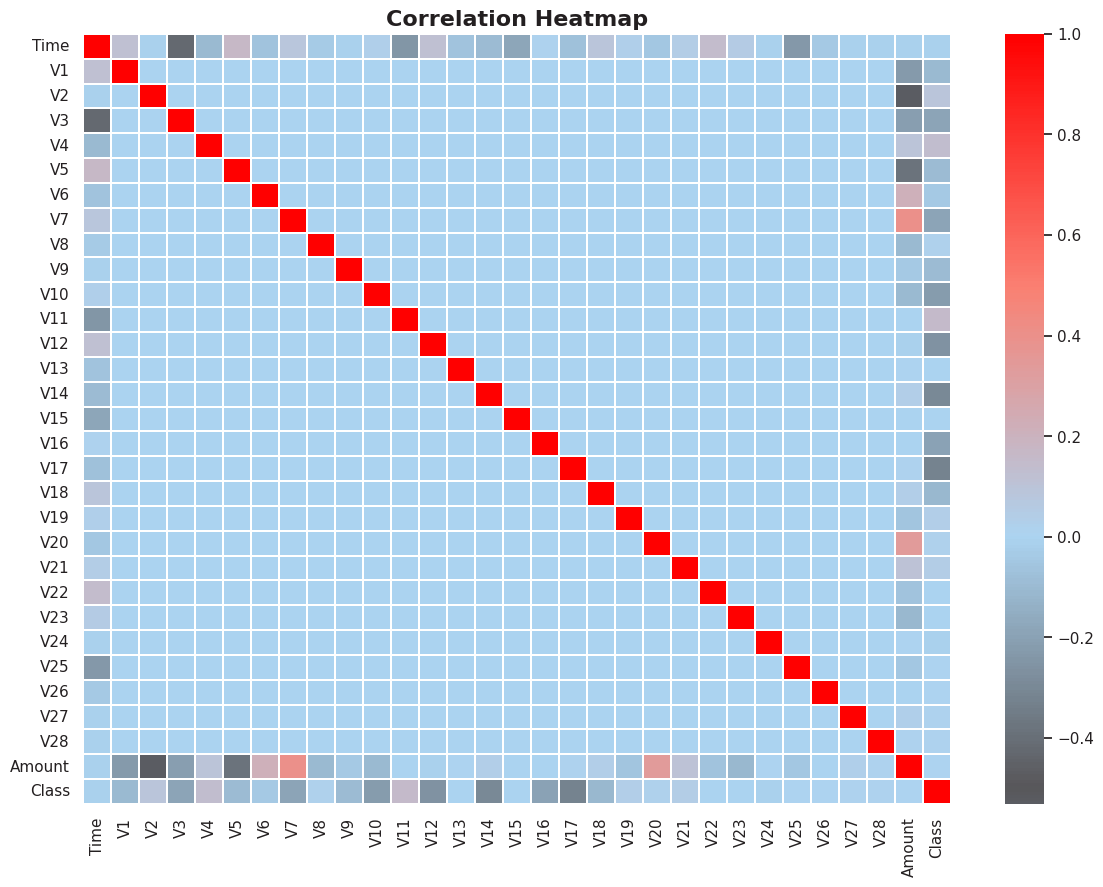

In [29]:
from matplotlib.colors import LinearSegmentedColormap

gs_cmap = LinearSegmentedColormap.from_list(
    "gs_cmap",
    [GS_BLUE, GS_GRAY, GS_LIGHT_BLUE, "salmon", "red"]
)

plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap=gs_cmap, center=0, linewidths=0.2)
plt.title("Correlation Heatmap", fontsize=16, color=GS_BLACK)
plt.show()


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Drop Time column
df_clean = df.drop(columns=["Time"])

# 2. Split X and y
X = df_clean.drop("Class", axis=1)
y = df_clean["Class"]

# 3. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model

In [31]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:,1]

# Evaluate Logistic Regression

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

roc_auc = roc_auc_score(y_test, y_prob_lr)
print("ROC AUC:", roc_auc)



Confusion Matrix:
 [[56851    13]
 [   35    63]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC: 0.957816286334455


# ROC Curve

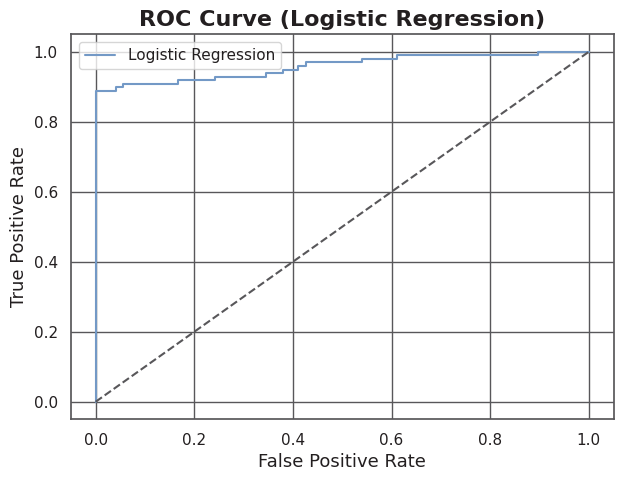

In [34]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_prob_lr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color=GS_BLUE, label='Logistic Regression')
plt.plot([0,1], [0,1], linestyle='--', color=GS_GRAY)

plt.title("ROC Curve (Logistic Regression)", color=GS_BLACK)
plt.xlabel("False Positive Rate", color=GS_BLACK)
plt.ylabel("True Positive Rate", color=GS_BLACK)
plt.legend()
plt.show()

# Precision-Recall Curve

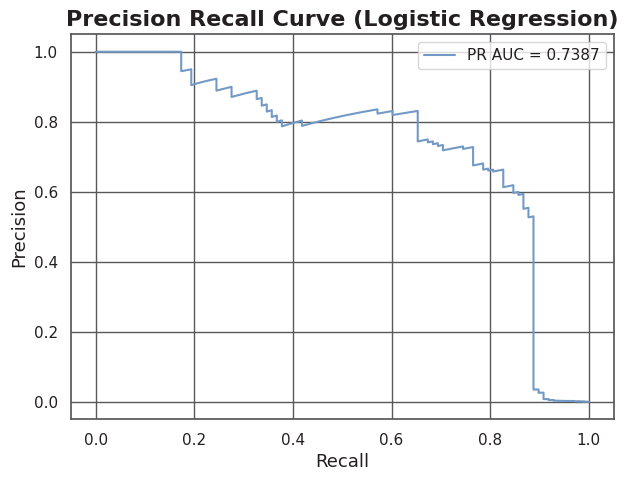

In [35]:
precision, recall, _ = precision_recall_curve(y_test, y_prob_lr)
pr_auc = auc(recall, precision)

plt.figure(figsize=(7,5))
plt.plot(recall, precision, color=GS_BLUE, label=f"PR AUC = {pr_auc:.4f}")
plt.title("Precision Recall Curve (Logistic Regression)", color=GS_BLACK)
plt.xlabel("Recall", color=GS_BLACK)
plt.ylabel("Precision", color=GS_BLACK)
plt.legend()
plt.show()

# Fraud counts and Percentage

In [36]:
fraud_counts = df["Class"].value_counts()
fraud_percentage = df["Class"].value_counts(normalize=True) * 100

fraud_counts, fraud_percentage


(Class
 0    284315
 1       492
 Name: count, dtype: int64,
 Class
 0    99.827251
 1     0.172749
 Name: proportion, dtype: float64)

# Fraud Count and Fraud Percentage


In [37]:
fraud_counts = df["Class"].value_counts()
fraud_percentage = df["Class"].value_counts(normalize=True) * 100

print("Fraud counts")
print(fraud_counts)

print("\nFraud percentages")
print(fraud_percentage)


Fraud counts
Class
0    284315
1       492
Name: count, dtype: int64

Fraud percentages
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


# Total Revenue Lost to Fraud

In [38]:
fraud_loss = df[df["Class"] == 1]["Amount"].sum()
print("Total revenue lost to fraud = $", fraud_loss)

Total revenue lost to fraud = 60127.97


# Average Fraud Transaction Amount

In [39]:
avg_fraud_amount = df[df["Class"] == 1]["Amount"].mean()
print("Average fraud transaction amount = $", avg_fraud_amount)

Average fraud transaction amount = 122.21132113821139


# Average Normal Transaction Amount


In [40]:
avg_normal_amount = df[df["Class"] == 0]["Amount"].mean()
print("Average normal transaction amount = $", avg_normal_amount)


Average normal transaction amount = 88.29102242231328


# Fraud Amount Range

In [41]:
fraud_amount_min = df[df["Class"] == 1]["Amount"].min()
fraud_amount_max = df[df["Class"] == 1]["Amount"].max()

print("Fraud amount minimum = $", fraud_amount_min)
print("Fraud amount maximum = $", fraud_amount_max)

Fraud amount minimum = 0.0
Fraud amount maximum = 2125.87


# High Risk Amount Threshold (P95)

In [42]:
p95_fraud = np.percentile(df[df["Class"] == 1]["Amount"], 95)
print("Ninety fifth percentile of fraud amount = $", p95_fraud)

Ninety fifth percentile of fraud amount = 640.9049999999999


# Time of Day Summary for Fraud

In [43]:
fraud_time_summary = df[df["Class"] == 1]["Time"].describe()
print(fraud_time_summary)

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64


# PCA Feature Summary for Top Fraud Signals

In [45]:
top_features = ["V10", "V12", "V14", "V17"]

for col in top_features:
 print("\nSummary for", col)
 print(df[col].describe())


Summary for V10
count    2.848070e+05
mean     2.239053e-15
std      1.088850e+00
min     -2.458826e+01
25%     -5.354257e-01
50%     -9.291738e-02
75%      4.539234e-01
max      2.374514e+01
Name: V10, dtype: float64

Summary for V12
count    2.848070e+05
mean    -1.247012e-15
std      9.992014e-01
min     -1.868371e+01
25%     -4.055715e-01
50%      1.400326e-01
75%      6.182380e-01
max      7.848392e+00
Name: V12, dtype: float64

Summary for V14
count    2.848070e+05
mean     1.207294e-15
std      9.585956e-01
min     -1.921433e+01
25%     -4.255740e-01
50%      5.060132e-02
75%      4.931498e-01
max      1.052677e+01
Name: V14, dtype: float64

Summary for V17
count    2.848070e+05
mean    -3.772171e-16
std      8.493371e-01
min     -2.516280e+01
25%     -4.837483e-01
50%     -6.567575e-02
75%      3.996750e-01
max      9.253526e+00
Name: V17, dtype: float64


# Risk Score

In [47]:
df["risk_score"] = (
(df["Amount"] > avg_fraud_amount).astype(int) +
(df["V14"] < df["V14"].quantile(0.05)).astype(int) +
(df["V10"] < df["V10"].quantile(0.05)).astype(int) +
(df["V12"] < df["V12"].quantile(0.05)).astype(int)
)

# Count of high Risk transactions

In [48]:
high_risk = df[df["risk_score"] >= 3]
print("High risk transactions =", len(high_risk))

High risk transactions = 1074


# Estimate Revenue Saved if High Risk Alerts Were Used

In [49]:
revenue_saved = high_risk[high_risk["Class"] == 1]["Amount"].sum()
print("Estimated revenue saved if high risk rules were active =", revenue_saved)

Estimated revenue saved if high risk rules were active = 47990.81


# KPI Summary Table

In [50]:
print("\nKPI Summary")

print("Fraud rate percent =", fraud_percentage[1])
print("Total fraud loss =", fraud_loss)
print("Average fraud transaction amount =", avg_fraud_amount)
print("Ninety fifth percentile fraud amount =", p95_fraud)
print("High risk transactions =", len(high_risk))
print("Estimated revenue saved =", revenue_saved)


KPI Summary
Fraud rate percent = 0.1727485630620034
Total fraud loss = 60127.97
Average fraud transaction amount = 122.21132113821139
Ninety fifth percentile fraud amount = 640.9049999999999
High risk transactions = 1074
Estimated revenue saved = 47990.81


# Risk Segmentation Table

In [53]:
df["risk_segment"] = df["risk_score"].apply(
lambda x: "High" if x >= 3 else ("Medium" if x == 2 else "Low")
)
df["risk_segment"].value_counts()

risk_segment
Low       274136
Medium      9597
High        1074
Name: count, dtype: int64

# Manual Review Workload Estimate

In [54]:
manual_review_volume = len(df[df["risk_segment"] == "High"])
print("Manual review volume =", manual_review_volume)


Manual review volume = 1074


# Fraud Probability Calibration Curve

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


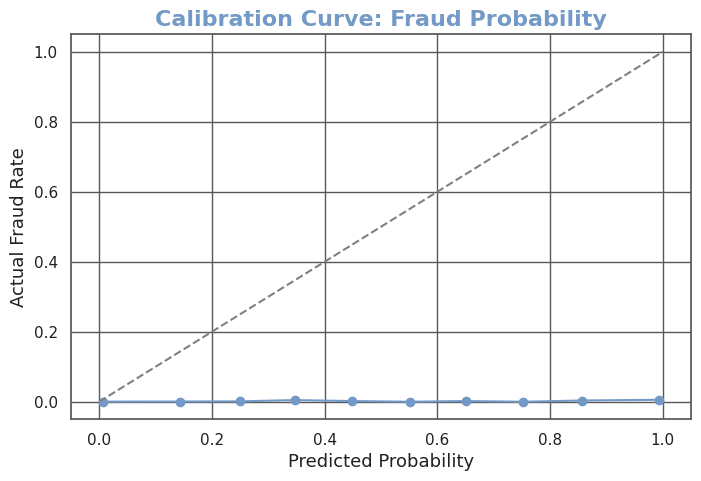

In [59]:
from sklearn.calibration import calibration_curve

probs = log_reg.predict_proba(X_test)[:,1]
fraction_pos, mean_pred = calibration_curve(y_test, probs, n_bins=10)

plt.figure(figsize=(8,5))
plt.plot(mean_pred, fraction_pos, marker='o', color=GS_BLUE)
plt.plot([0,1],[0,1],'--',color='gray')
plt.title("Calibration Curve: Fraud Probability", color=GS_BLUE)
plt.xlabel("Predicted Probability")
plt.ylabel("Actual Fraud Rate")
plt.show()


# Confusion Matrix Heatmap

In [66]:
y_pred = log_reg.predict(X_test)

y_pred[:10]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

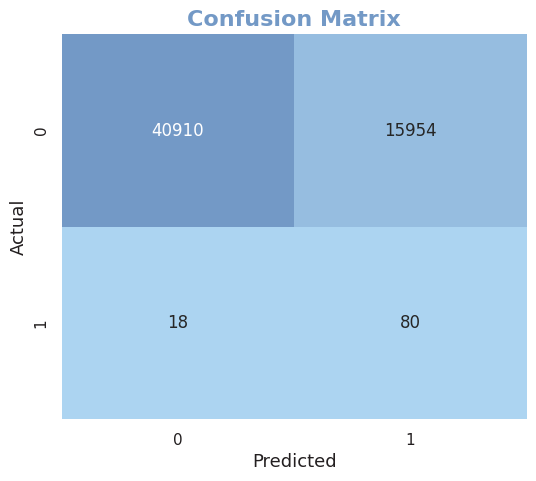

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

gs_cmap = LinearSegmentedColormap.from_list(
"gs_map",
[GS_LIGHT_BLUE, GS_BLUE]
)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap=gs_cmap, cbar=False)
plt.title("Confusion Matrix", color=GS_BLUE)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Contribution Bar Chart

/var/folders/n5/c4crmm5x5jg679nymtmcb9dh0000gn/T/ipykernel_48052/4225666669.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coef', y='feature', data=feature_importance, palette=[GS_BLUE])
/var/folders/n5/c4crmm5x5jg679nymtmcb9dh0000gn/T/ipykernel_48052/4225666669.py:6: UserWarning: 
The palette list has fewer values (1) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='coef', y='feature', data=feature_importance, palette=[GS_BLUE])


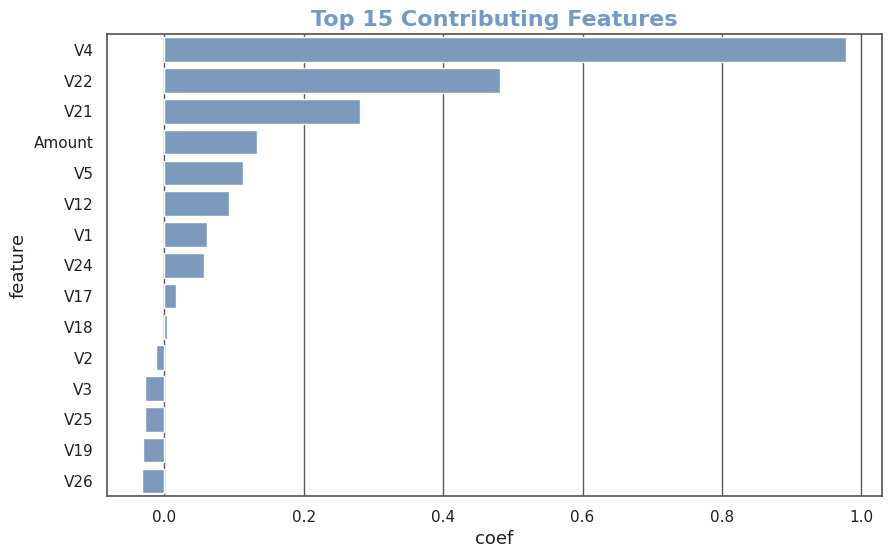

In [63]:
coeffs = log_reg.coef_[0]
feature_importance = pd.DataFrame({'feature': X_train.columns, 'coef': coeffs})
feature_importance = feature_importance.sort_values('coef', ascending=False)[:15]

plt.figure(figsize=(10,6))
sns.barplot(x='coef', y='feature', data=feature_importance, palette=[GS_BLUE])
plt.title("Top 15 Contributing Features", color=GS_BLUE)
plt.show()

# Cumulative Financial Loss Curve

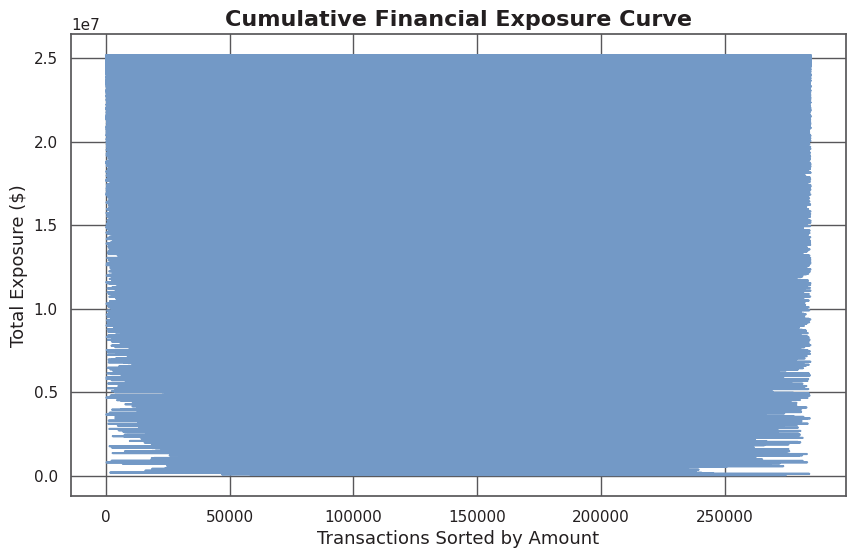

In [64]:
df_sorted = df.sort_values("Amount", ascending=False)
df_sorted["cum_loss"] = df_sorted["Amount"].cumsum()

plt.figure(figsize=(10,6))
plt.plot(df_sorted["cum_loss"], color=GS_BLUE)
plt.title("Cumulative Financial Exposure Curve")
plt.xlabel("Transactions Sorted by Amount")
plt.ylabel("Total Exposure ($)")
plt.show()